In [35]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
from utils import constants as cnst
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
from ccores import cores

In [34]:
cd ..

/home/ck/pythonWorkspace


In [102]:
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2021/09/13/IR_108_BT_20210913_2100.nc'

In [122]:
data = xr.open_dataset(testfile, decode_cf=False)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

In [123]:
data = data.isel(time=0)
data['IR108_BT'].values = (data['IR108_BT'])[:,::-1]

In [124]:
data

<xarray.Dataset>
Dimensions:   (x: 1804, y: 580)
Coordinates:
    time      float64 0.0
  * x         (x) int32 0 1 2 3 4 5 6 7 ... 1797 1798 1799 1800 1801 1802 1803
  * y         (y) int32 0 1 2 3 4 5 6 7 8 ... 572 573 574 575 576 577 578 579
Data variables:
    IR108_BT  (x, y) float32 20.022125 20.151428 ... 20.538452 20.280579
    lat_2d    (x, y) float32 ...
    lon_2d    (x, y) float32 ...
Attributes:
    description:  SEVIRI 10.8 micron BT extracted from EUMETSAT HRIT files
    history:      Created 20210913
    source:       EUMETSAT SEVIRI HRIT

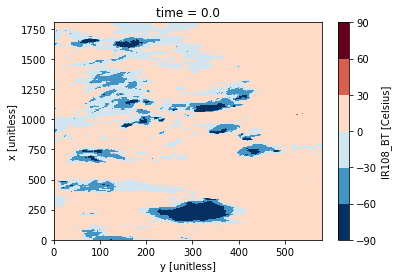

In [125]:
data['IR108_BT'].plot.contourf()

In [130]:
cut=data.sel(x=slice(100,1250), y=slice(0,500))#.sel(x=slice(0,500), y=slice(200,400))#.sel(x=slice(500,1000), y=slice(80,350))

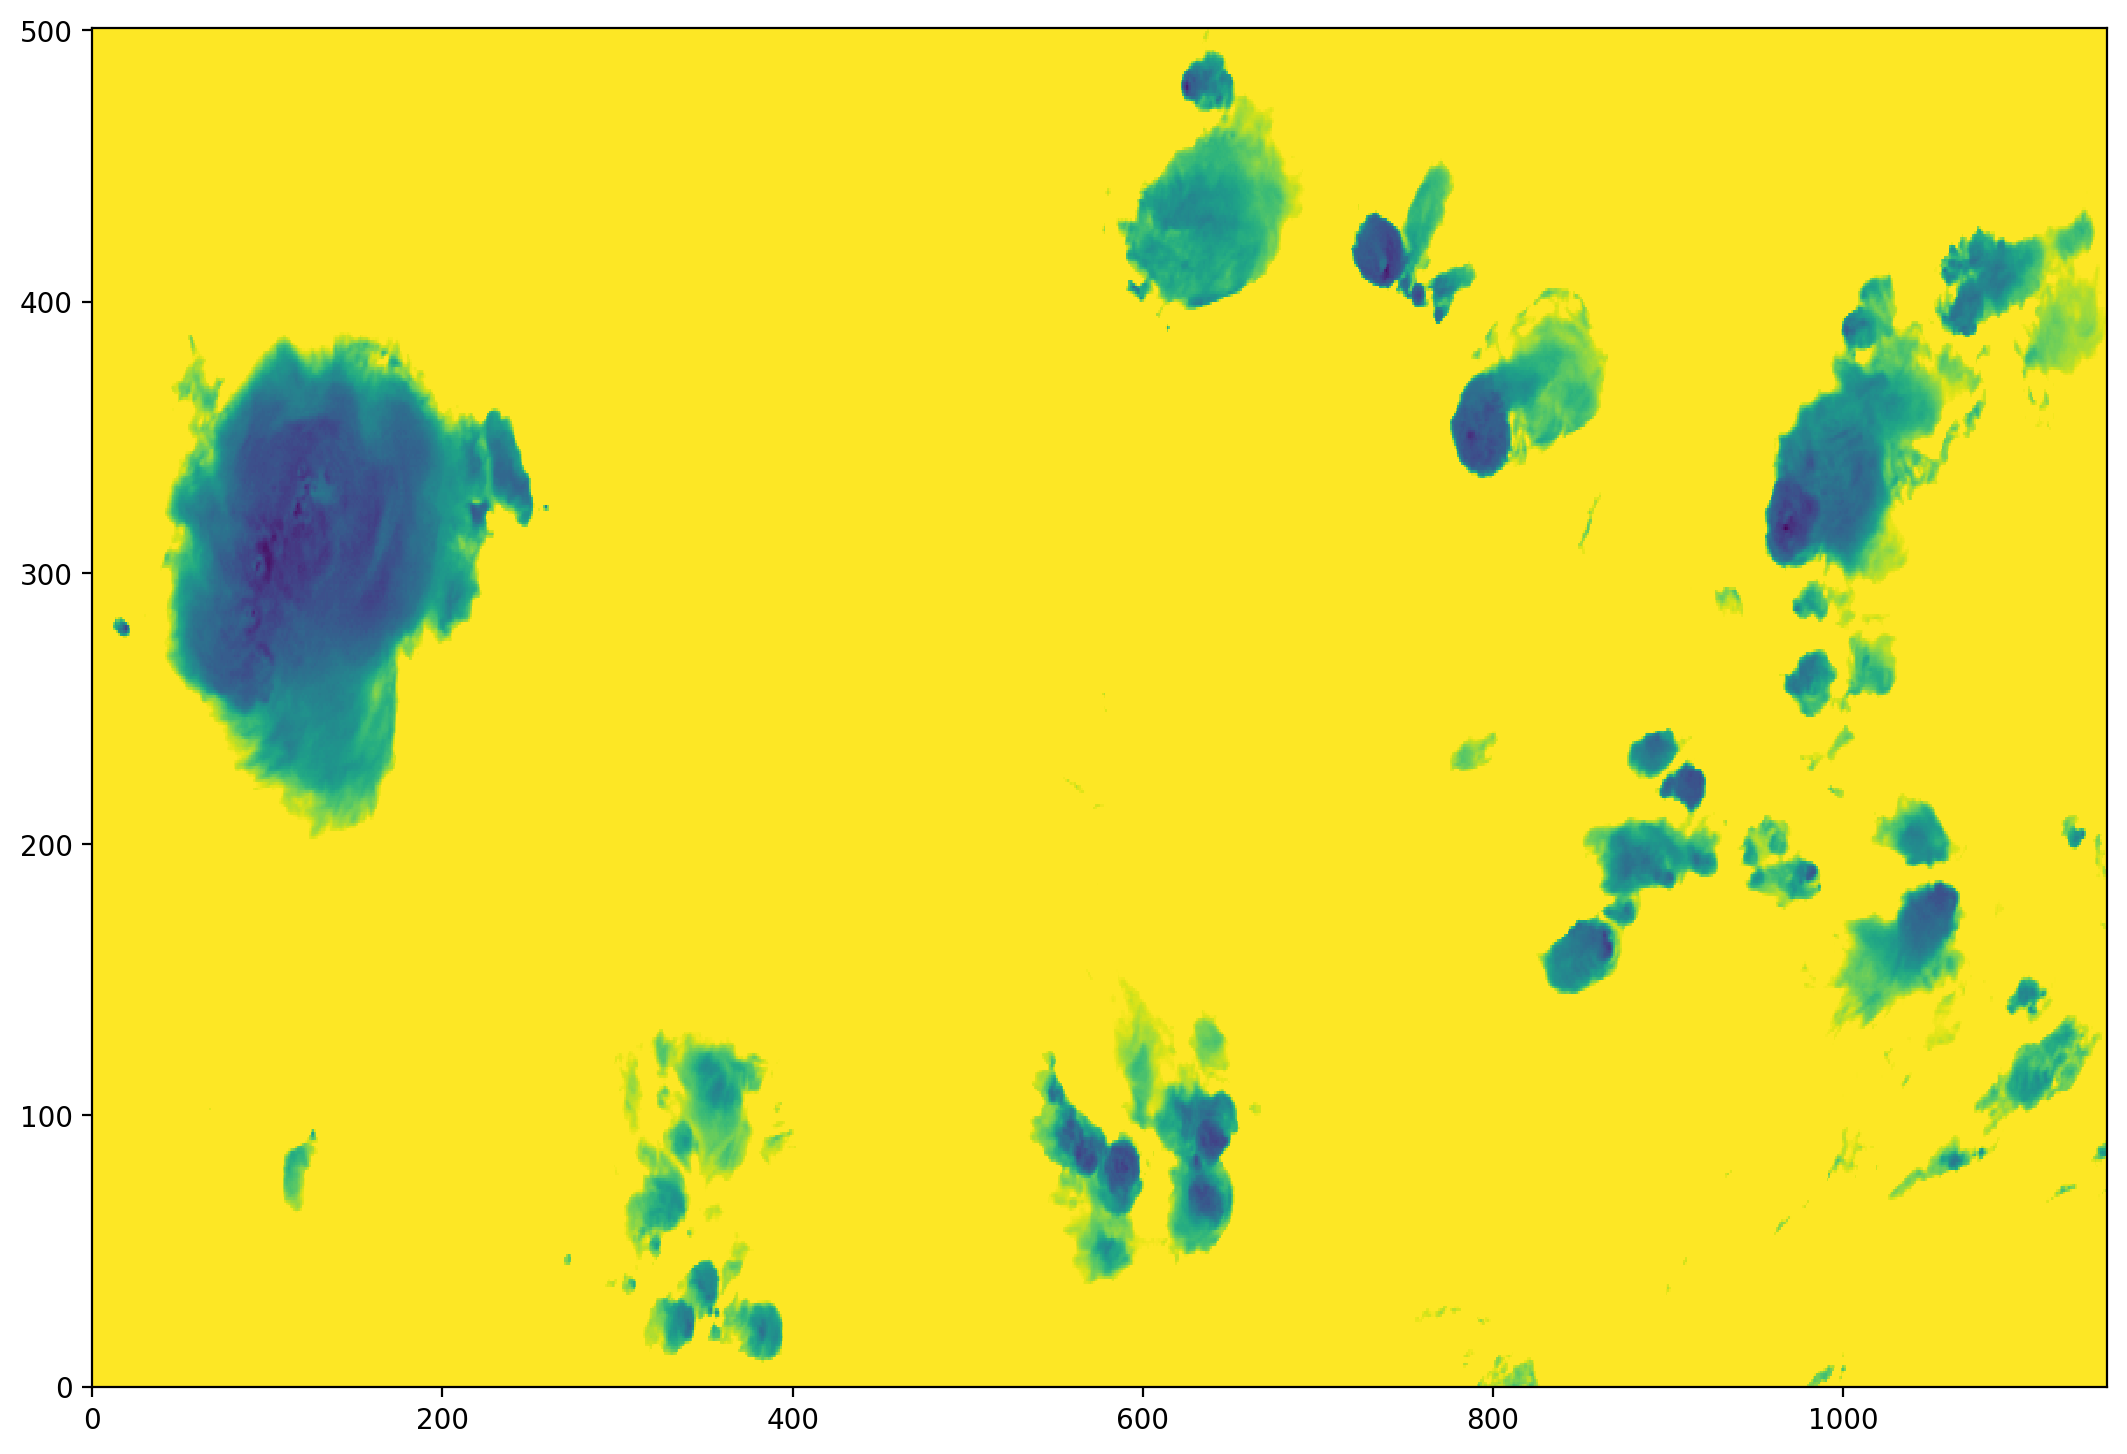

In [131]:
f = plt.figure(figsize=(13,9), dpi=200)
plt.pcolormesh(cut['IR108_BT'].T,vmin=-90, vmax=-40)

In [151]:
### Create a wavelet decomposition object first. In this example, we initialise the NFLICS nowcasting 5km setup. The setups can be defined in ccores.constants
wObj = cores.dataset('METEOSAT3K_veraLS')

Initialised wavelet with scales:  [  9.          12.552693    17.50778905  24.41887789  34.05807528
  47.50228479  66.25351084  92.40666462 128.88361021 179.75959904]


In [152]:



grid_lons, grid_lats = np.meshgrid(cut.x.values, cut.y.values)
### The next step prepares the tir image for the wavelet routine. 'Perfect image' example, WITH edge smoothing.
wObj.read_img(cut['IR108_BT'].T.values, grid_lons, grid_lats, edge_smoothing=False)

outmin -89.70978 0.0


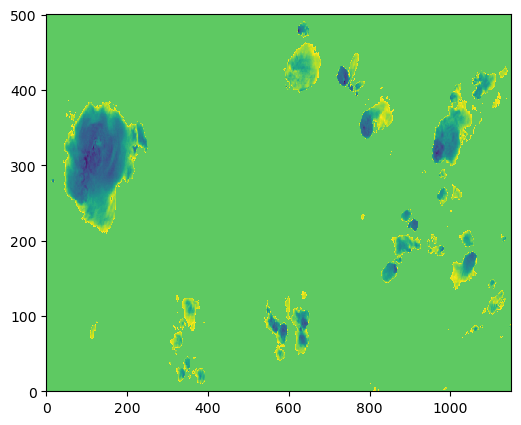

In [153]:
### The object saves the filtered image
f = plt.figure(figsize=(6,5), dpi=100)
ax = f.add_subplot(111)
plt.pcolormesh(wObj.image)

In [154]:
wObj.applyWavelet()

Text(0.5, 1.0, 'Contours: 17.50778905342114 km scale cores')

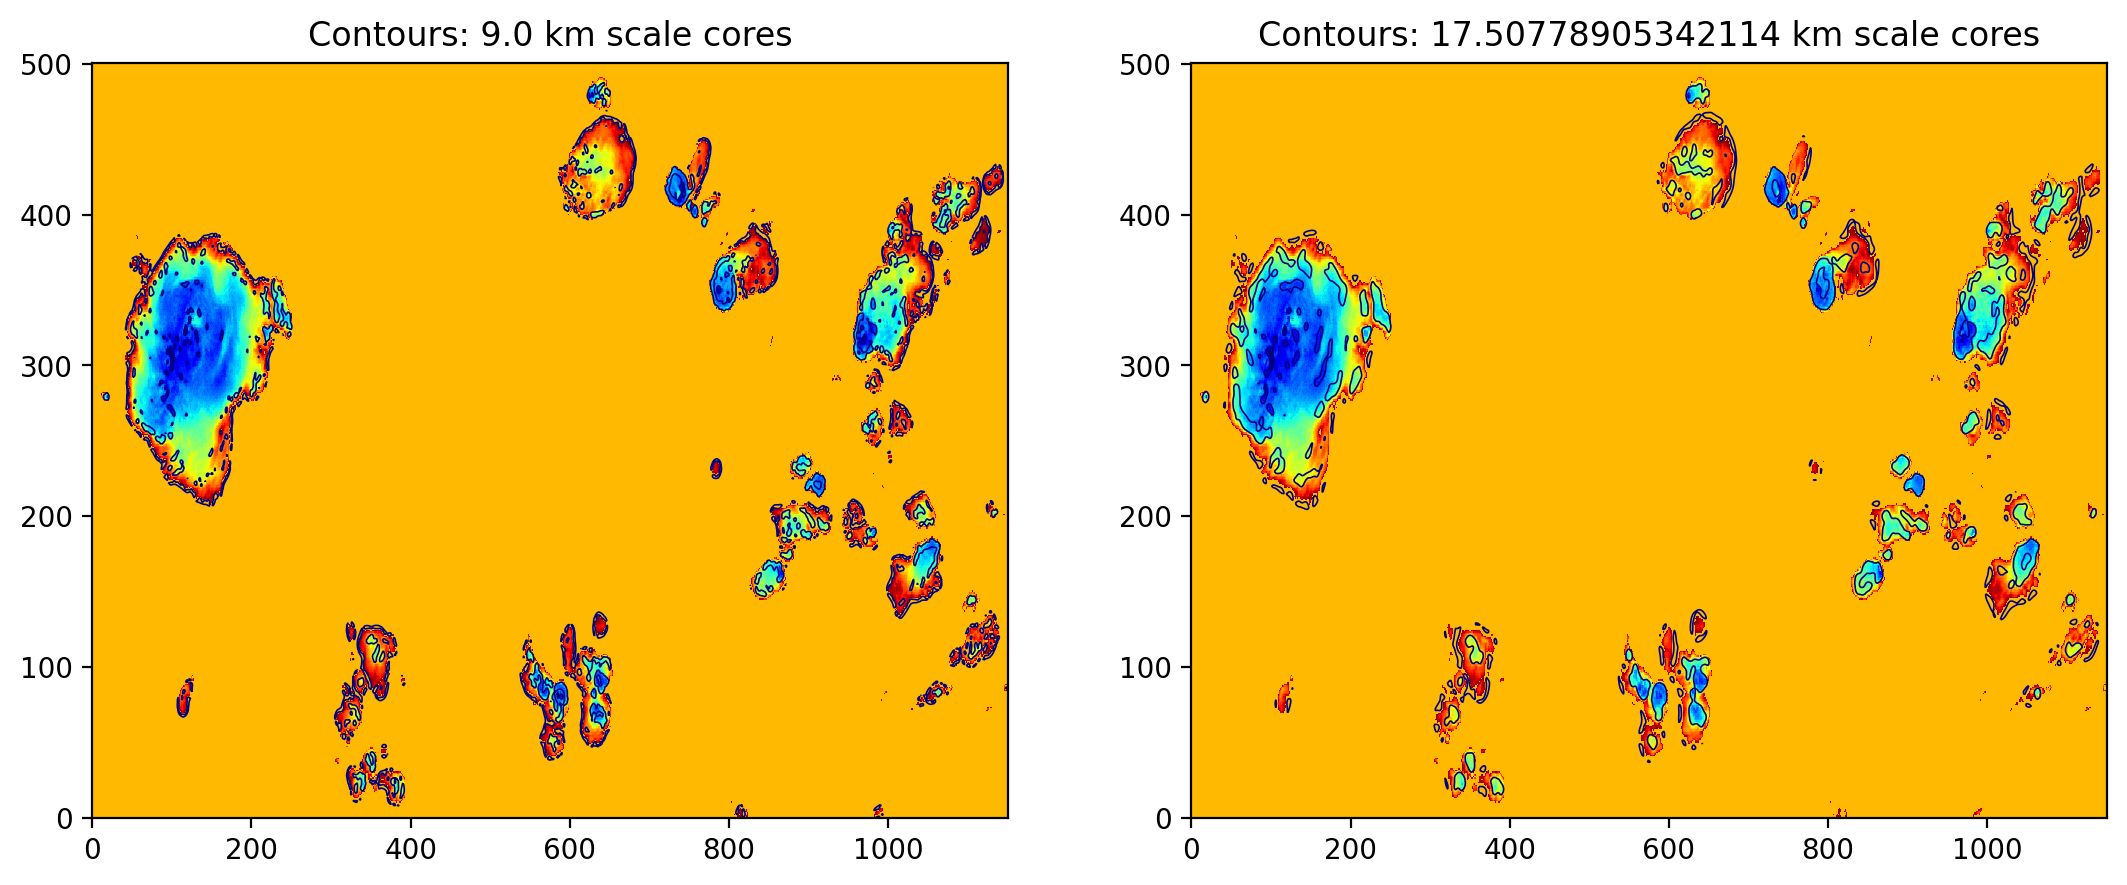

In [155]:
### Same powers as above but as contours plotted onto the thermal-infrared image. 

f = plt.figure(figsize=(13,11), dpi=200)

ax = f.add_subplot(221)

plt.pcolormesh(wObj.image, vmax=-50, vmin=-85, cmap='jet')
scale_id = 0
plt.contour(wObj.power[scale_id,:,:], levels=[0,1], cmap='jet_r', linewidths=0.6)
plt.title('Contours: '+str(wObj.scales[scale_id])+' km scale cores')

ax = f.add_subplot(222)
scale_id = 2
plt.pcolormesh(wObj.image, vmax=-50, vmin=-85, cmap='jet')
plt.contour(wObj.power[scale_id,:,:], levels=[0,1], cmap='jet_r', linewidths=0.6)
plt.title('Contours: '+str(wObj.scales[scale_id])+' km scale cores')

In [158]:
filtered_power = wObj.scaleWeighting(wtype='nflicsv2')

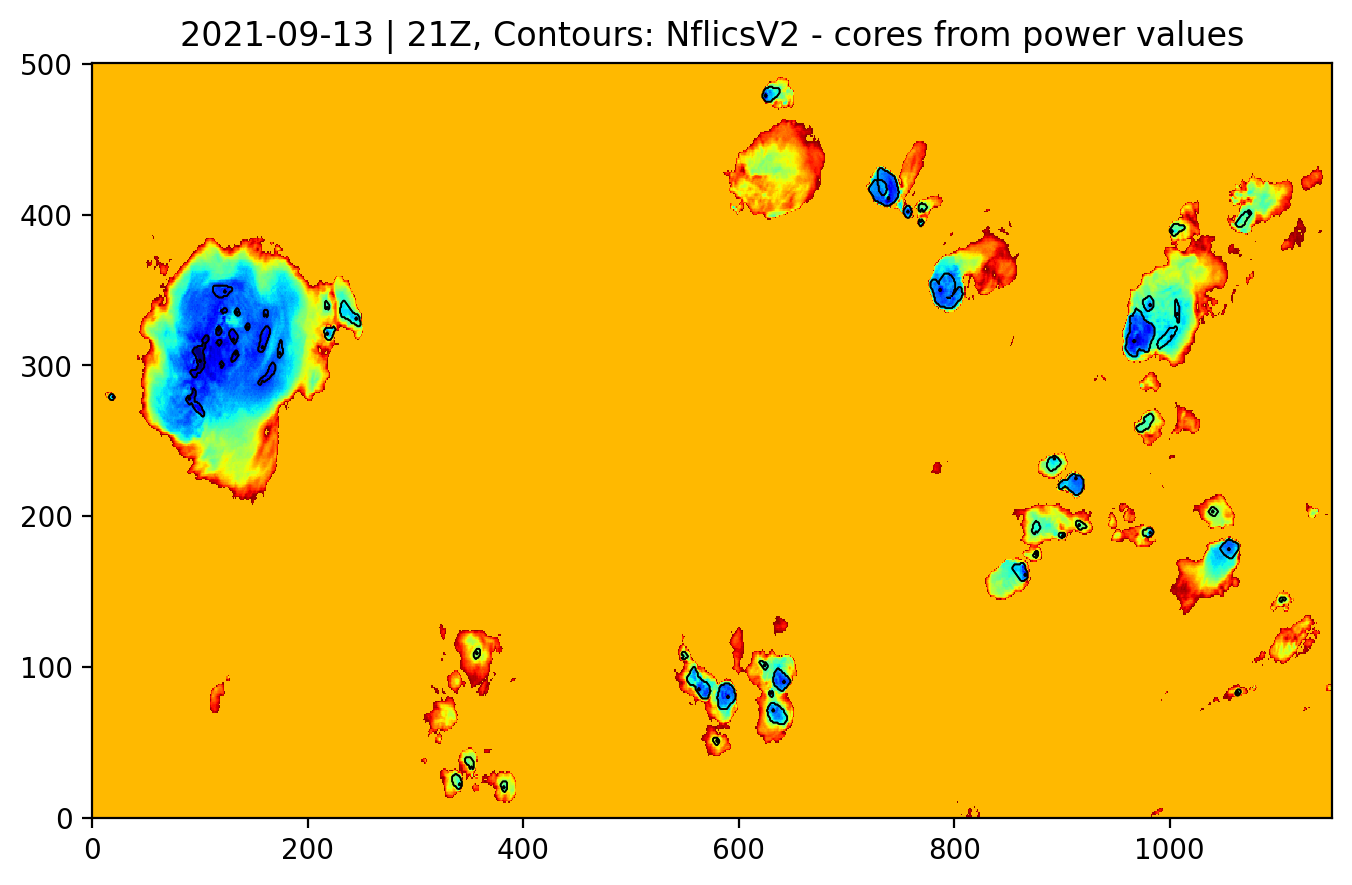

In [165]:
### For test purposes, we introduce some NaNs to create a second image

f = plt.figure(figsize=(8,5), dpi=200)

ax = f.add_subplot(111)

plt.pcolormesh(wObj.image, vmax=-50, vmin=-85, cmap='jet')

plt.contour(filtered_power, levels=[0,1], colors='k', linewidths=0.6)
plt.title('2021-09-13 | 21Z, Contours: NflicsV2 - cores from power values')
f.savefig('/home/ck/DIR/cornkle/figs/NFLICS/cores_nflicsV2_3km.jpg')